# Using Machine Learning Tools: Assignment 1

## Overview

In this assignment, you will apply some popular machine learning techniques to the problem of predicting bike rental demand. A data set has been provided containing records of bike rentals in Seoul, collected during 2017-18.

The scenario for this assignment is that you are a new employee of a company (that rents bikes, alongside other activities) and you have been assigned the task of predicting the bike rentals. Your line manager has given you some instructions (those shown below) but is expecting you to be able to do this task without close supervision and to report back with understandable and concise text, graphics and code (and of course the company wants a copy of all the code required to perform this task). Naturally, you are wanting to show that you are a valuable member of the company and although the company allows the use of ChatGPT, you will want to show that you are making useful contributions and that you bring value to the company beyond just being able to type instructions into ChatGPT, as otherwise the company might replace you with a cheaper data entry employee. Hence, you should use ChatGPT whenever you like (or whenever instructed to - see later) but do highlight how your own knowledge and judgement makes a contribution.

The main aims of this assignment are:

- to practice using tools for loading and viewing data sets;
- to check data for common pitfalls and clean it up;
- to plan a simple experiment and prepare the data accordingly;
- to run your experiment and to report and interpret your results clearly and concisely.

This assignment relates to the following ACS CBOK areas: abstraction, design, hardware and software, data and information, HCI and programming.

## General instructions

This assignment is divided into several tasks. Use the spaces provided in this notebook to answer the questions posed in each task. Some questions require writing code, some require graphical results, and some require short comments or analysis as text. It is your responsibility to make sure your responses are clearly labelled and your code has been fully executed (with the correct results displayed) before submission!

**Do not** manually edit the data set file we have provided! For marking purposes, it's important that your code is written to be able to be run correctly on the original data file.

When creating graphical output, label is clearly, with appropriate titles, xlabels and ylabels, as appropriate.

Most of the tasks in this assignment only require writing a few lines of code! One goal of the assignment is explore [sklearn](https://scikit-learn.org/stable/index.html), [pandas](https://pandas.pydata.org/pandas-docs/stable/index.html), [matplotlib](https://matplotlib.org/stable/index.html) and other libraries you will find useful throughout the course, so feel free to use the functions they provide. You are expected to search and carefully read the documentation for functions that you use, to ensure you are using them correctly.

Chapter 2 of the reference book is based on a similar workflow to this prac, so you may look there for some further background and ideas. You can also use any other general resources on the internet that are relevant, including ChatGPT, although do not use someone else's code or answers that directly relate to these questions. If you take a large portion of code or text from the internet or ChatGPT then you should reference where this was taken from, but we do not expect any references for small pieces of code, such as from documentation, blogs or tutorials. Taking, and adapting, small portions of code is expected and is common practice when solving real problems.

The following code imports some of the essential libraries that you will need. You should not need to modify it, but you are expected to import other libraries as needed.


In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

import sklearn
assert sklearn.__version__ >= "0.20"

import pandas as pd
assert pd.__version__ >= "1.0"

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import seaborn as sns


/var/folders/g6/14jz0x_d1s7cgg884fbzt5f80000gn/T/ipykernel_82041/3403564142.py:8: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## Step 1: Loading and initial processing of the dataset (40%)

Download the data set `SeoulBikeData.csv` **from MyUni** using the link provided on the assignment page.

The data is stored in a CSV (comma separated values) file and contains the following information

 - Date: year-month-day
 - Rented Bike Count: Count of bikes rented at each hour
 - Hour: Hour of the day
 - Temperature: Temperature in degrees Celsius
 - Humidity: %
 - Windspeed: m/s
 - Visibility: 10m
 - Dew point temperature: degrees Celsius
 - Solar radiation: MJ/m2
 - Rainfall: mm
 - Snowfall: cm
 - Seasons: Winter, Spring, Summer, Autumn
 - Holiday: Holiday/No holiday
 - Functional Day: NoFunc(Non Functional Hours), Fun(Functional hours)

### 1.1 Load and visualise the data

**Load the data set from the csv file into a DataFrame, summarise it in text using one pandas function, and then visualise each feature with one type of plot (this can be different for each feature).**

In [2]:
### Your code here
df=pd.read_csv('Seoul Bike Data.csv')
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Date,8760,365,01/12/2017,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rented Bike Count,8760.0,NaN,NaN,NaN,714.876027,1160.468927,0.0,191.0,504.5,1066.0,90997.0
Hour,8760.0,NaN,NaN,NaN,11.5,6.922582,0.0,5.75,11.5,17.25,23.0
Temperature (C),8760.0,NaN,NaN,NaN,12.945765,12.376168,-17.8,3.5,13.7,22.5,195.0
Humidity (%),8760.0,NaN,NaN,NaN,58.268014,20.807845,-2.2,42.0,57.0,74.0,455.0
Wind speed (m/s),8760.0,NaN,NaN,NaN,1.84895,10.665215,-0.7,0.9,1.5,2.3,991.1
Visibility (10m),8760.0,NaN,NaN,NaN,1436.825799,608.298712,27.0,940.0,1698.0,2000.0,2000.0
Dew point temperature (C),8760.0,NaN,NaN,NaN,4.073813,13.060369,-30.6,-4.7,5.1,14.8,27.2
Solar Radiation (MJ/m2),8760,347,0,4300,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rainfall(mm),8760,62,0,8211,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.head(10)

,Date,Rented Bike Count,Hour,Temperature (C),Humidity (%),Wind speed (m/s),Visibility (10m),Dew point temperature (C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37.0,2.2,2000,-17.6,0,0,0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38.0,0.8,2000,-17.6,0,0,0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39.0,1.0,2000,-17.7,0,0,0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40.0,0.9,2000,-17.6,0,0,0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36.0,2.3,2000,-18.6,0,0,0,Winter,No Holiday,Yes
5,01/12/2017,100,5,-6.4,37.0,1.5,2000,-18.7,0,0,0,Winter,No Holiday,Yes
6,01/12/2017,181,6,-6.6,35.0,1.3,2000,-19.5,0,0,0,Winter,No Holiday,Yes
7,01/12/2017,460,7,-7.4,38.0,0.9,2000,-19.3,0,0,0,Winter,No Holiday,Yes
8,01/12/2017,930,8,-7.6,37.0,1.1,2000,-19.8,0.01,0,0,Winter,No Holiday,Yes
9,01/12/2017,490,9,-6.5,27.0,0.5,1928,-22.4,0.23,0,0,Winter,No Holiday,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature (C)            8760 non-null   float64
 4   Humidity (%)               8760 non-null   float64
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature (C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   object 
 9   Rainfall(mm)               8760 non-null   object 
 10  Snowfall (cm)              8760 non-null   object 
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

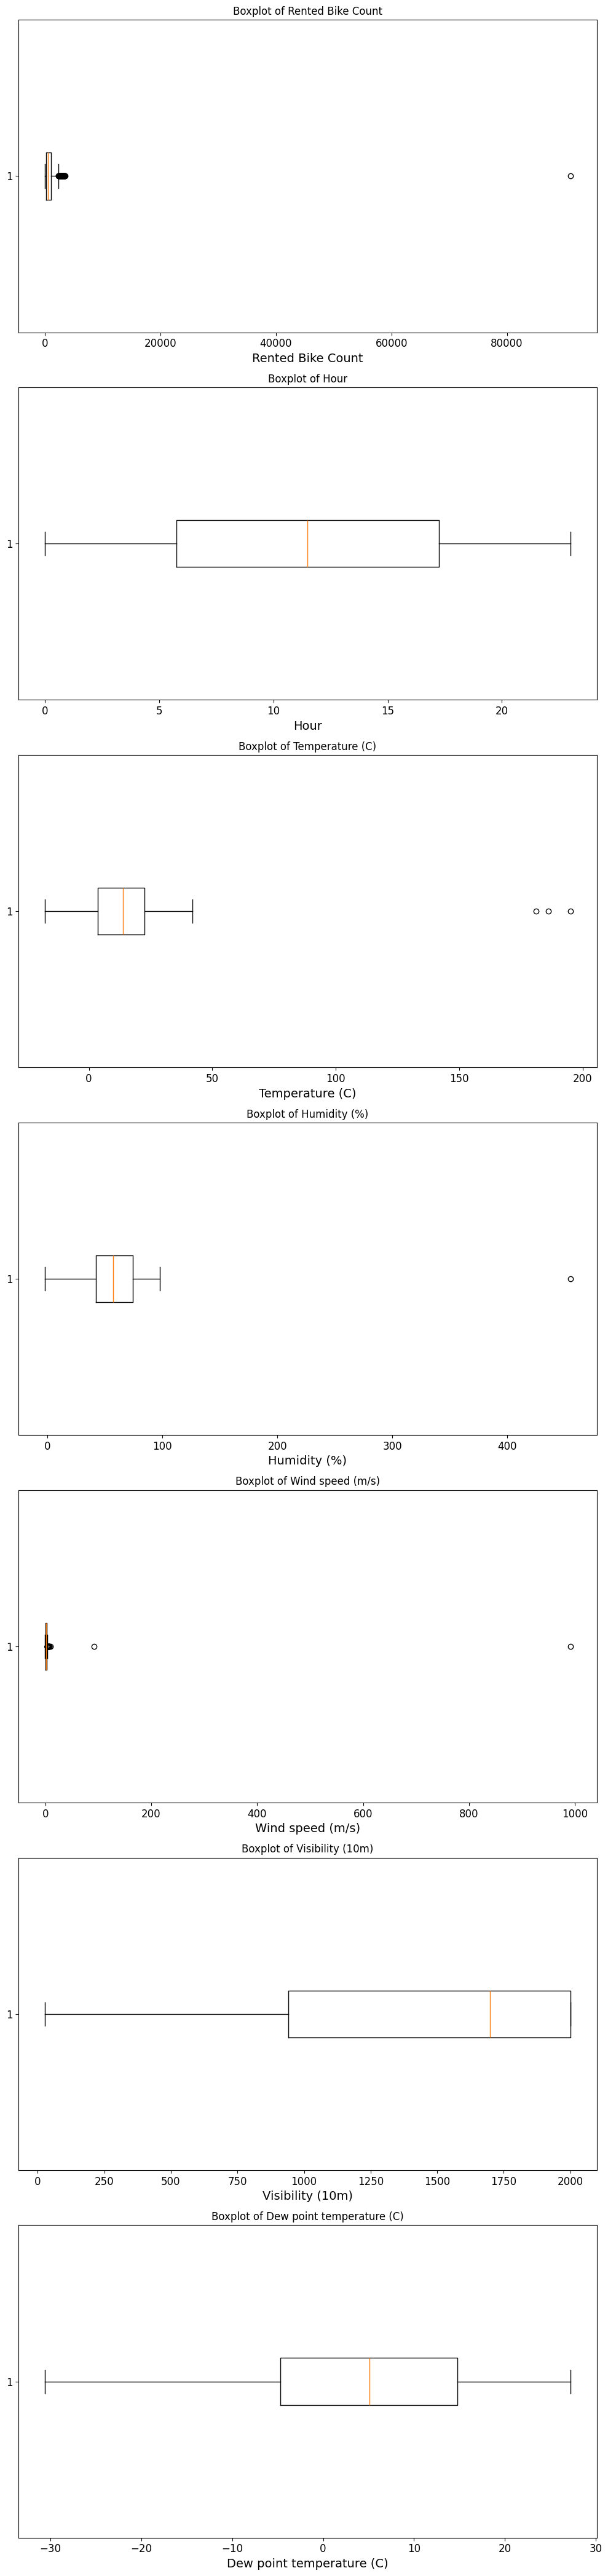

In [5]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

num_cols = len(numeric_columns)

# Set plot size for the entire figure
fig, axes = plt.subplots(nrows=num_cols, ncols=1, figsize=(10, 6*num_cols))

# Loop through each numeric column and plot a boxplot
for i, col in enumerate(numeric_columns):
    axes[i].boxplot(df[col].dropna(), vert=False)
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].set_xlabel(col)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the figure
plt.show()

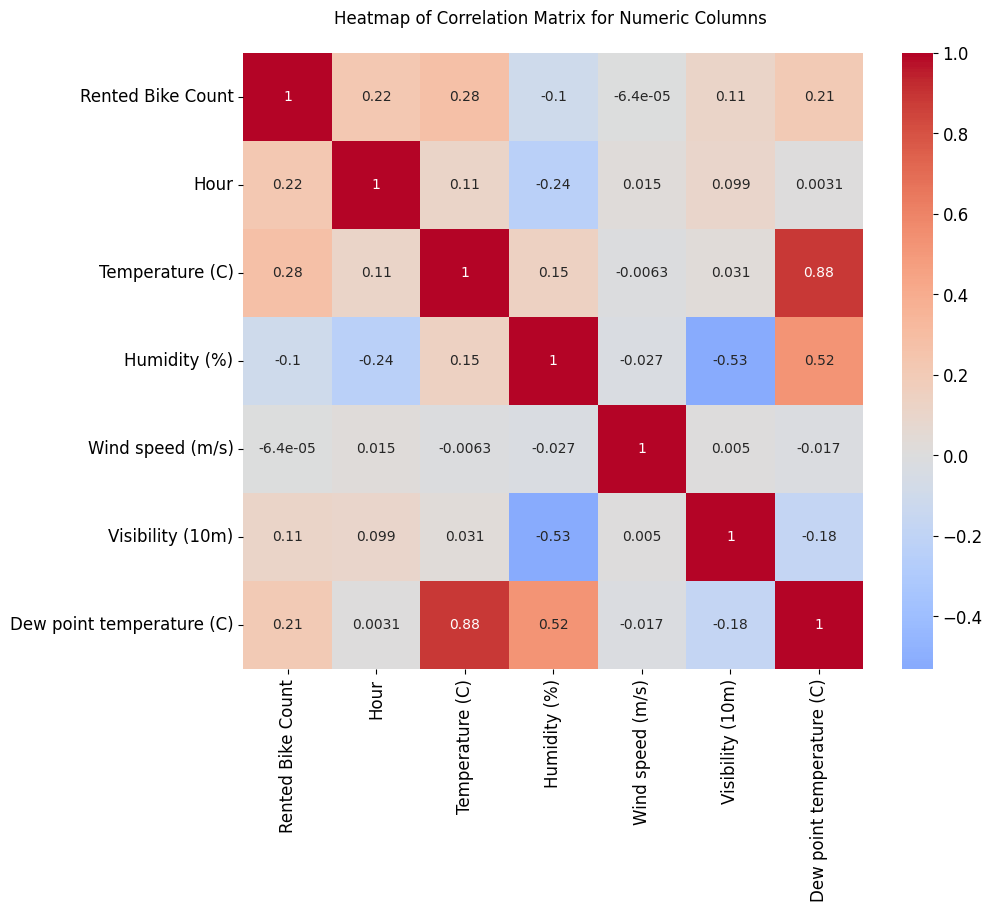

In [6]:
corr_matrix = df[numeric_columns].corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Heatmap of Correlation Matrix for Numeric Columns \n')
plt.show()

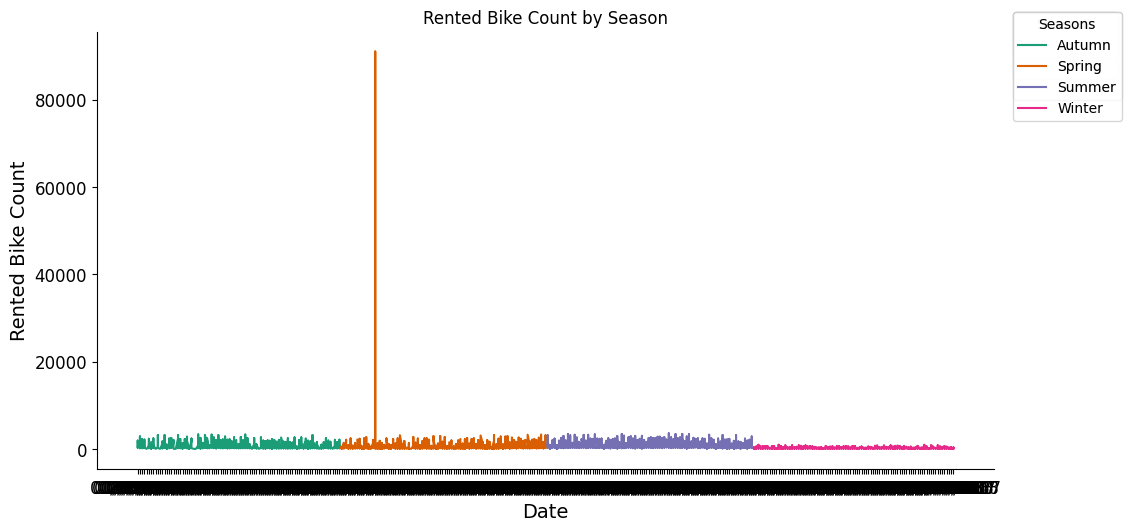

In [7]:
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['Rented Bike Count']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Seasons')):
  _plot_series(series, series_name, i)
  fig.legend(title='Seasons', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('Rented Bike Count')
plt.title('Rented Bike Count by Season')
plt.show()


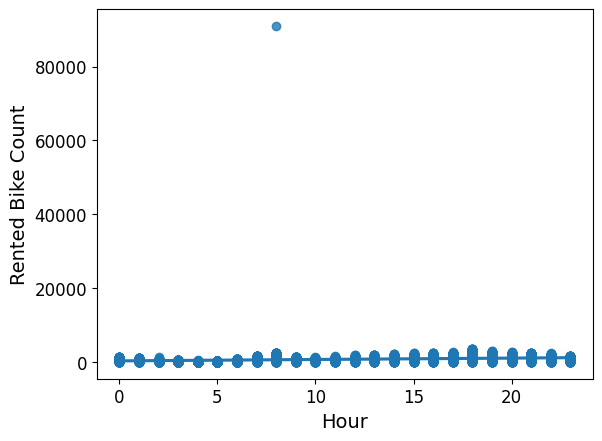

In [9]:
# prompt: Create a graph showing bike rental vs temperature

sns.regplot(x="Hour", y="Rented Bike Count", data=df)
plt.show()


### 1.2 Cleaning the data

Do the following to the data:
 - Using the "Functioning day" feature, **remove rows from the DataFrame** where the business is closed and then **delete the Functioning Day feature from the DataFrame**.
 - **Convert seasons to a one hot encoded format** (1 binary feature for each of the 4 seasons).
 - Replace the **Date** feature with a binary **Weekday** feature (1 for a weekday and 0 for weekend) using the code sample below or your own code.
 - **Convert remaining non-numerical features to a numerical format** or replace with NaN (i.e. `np.nan`) where not possible.
 - **Identify and fix any outliers and errors in the data**.

Save the result as a new csv file called `CleanedSeoulBikeData.csv` and **upload this** to MyUni along with this notebook when you submit your assignment.

In [10]:
#Dropping the Rows where the functioning day is 'No' and dropping the column

df_cleaned=df.copy()
df_cleaned=df_cleaned[df_cleaned['Functioning Day']=='Yes']
df_cleaned=df_cleaned.drop('Functioning Day',axis=1)


In [11]:
df_cleaned=pd.get_dummies(columns=['Seasons'],data=df_cleaned)

In [12]:
import datetime
def date_is_weekday(datestring):
    ### return 0 if weekend, 1 if weekday
    dsplit = datestring.split('/')
    wday = datetime.datetime(int(dsplit[2]),int(dsplit[1]),int(dsplit[0])).weekday()
    return int(wday<=4)

In [13]:

df_cleaned['Weekday'] = df_cleaned['Date'].apply(date_is_weekday)
df_cleaned.drop('Date', axis=1, inplace=True)


In [14]:
df_cleaned['Holiday']=df_cleaned['Holiday'].apply(lambda x: 1 if x == 'Holiday' else 0)

In [15]:
df_cleaned['Rainfall(mm)'].unique()

array(['0', '0.5', '1', '2.5', '0.1', '0.2', '0.3', '0.7', '1.6', '0.4',
       '1.1', '6.4', '9.5', '3.5', '0.9', '3.3', 'No Record', '1.4',
       '1.5', '3.7', '4.5', '9', '2', '8', '17', '7', '3', '1.9', '0.8',
       '4', '6', '5', '5.5', '2.4', '35', '19', '13.5', '10', '12.5',
       '11.5', '5.4', '10.5', '6.5', '16', '14.5', '4.9', '21.5', '12',
       '18.5', '7.5', '24', '8.5', '7.3', '1.3', '15.5', '29.5', '21',
       '13', '1.2', '18', '9.1', '1.8'], dtype=object)

In [16]:
df_cleaned['Snowfall (cm)'].unique()

array(['0', '0.1', '0.3', '0.4', '-0.4', '0.2', '1', '0.9', '0.8', '0.7',
       '0.6', '2.7', '4', '4.1', '4.3', '3.9', '3.1', '2.1', '1.4', '0.5',
       '1.3', '1.8', '2', '4.8', '5.1', '5', '4.2', '3.2', '2.6', '2.5',
       '2.3', '2.2', '1.9', '1.7', '1.6', '2.4', '1.2', '1.1',
       'No Record', '3', '3.3', '3.5', '3.4', '2.8', '1.5', '3.8', '3.7',
       '99', '7.1', '8.8', '7', '6', '3.6', '2.9'], dtype=object)

In [17]:
df_cleaned['Solar Radiation (MJ/m2)'].unique()

array(['0', '0.01', '0.23', '0.65', '0.94', '1.11', '1.16', '1.01',
       '0.54', '0.24', '0.08', '0.3', '0.8', '1', '1.09', '1.12', '0.99',
       '0.74', '0.22', '0.06', '0.02', '0.25', '0.43', '0.6', '0.69',
       '0.53', '0.2', '0.05', '0.64', '1.17', '0.88', '0.55', '0.18',
       '0.21', '0.63', '0.93', '1.08', '1.1', '0.96', '0.72', '0.36',
       '0.1', '0.14', '0.41', '0.98', '1.14', '1.04', '0.84', '0.51',
       '0.15', '1.22', '0.87', '0.56', '0.61', '0.89', '1.05', '1.13',
       '1.06', '0.4', '0.03', '0.28', '0.35', '0.62', '1.26', '1.24',
       '0.92', '0.58', '0.19', '1.23', '0.13', '0.52', '0.48', '0.09',
       '0.34', '0.42', '0.32', '0.86', '1.07', '0.17', '0.85', '0.47',
       '0.57', '0.91', '0.71', '0.12', '0.67', '0.77', '0.78', '0.16',
       '0.66', '0.38', '0.11', '0.04', '0.07', '1.18', '0.9', '0.33',
       '0.75', '0.59', '0.29', '0.81', '0.83', '0.39', '1.15', '1.03',
       '0.95', '0.76', '1.02', '0.26', '0.5', '0.27', '0.73', '0.46',
       '0.31'

In [18]:
# prompt: Convert snowfall,Rainfall and solar radiation to numerical values from object

df_cleaned['Rainfall(mm)'] = df_cleaned['Rainfall(mm)'].replace('No Record', np.nan)
df_cleaned['Snowfall (cm)'] = df_cleaned['Snowfall (cm)'].replace('No Record', np.nan)
df_cleaned['Solar Radiation (MJ/m2)'] = df_cleaned['Solar Radiation (MJ/m2)'].replace('w.39', np.nan)

df_cleaned['Rainfall(mm)'] = pd.to_numeric(df_cleaned['Rainfall(mm)'])
df_cleaned['Snowfall (cm)'] = pd.to_numeric(df_cleaned['Snowfall (cm)'])
df_cleaned['Solar Radiation (MJ/m2)'] = pd.to_numeric(df_cleaned['Solar Radiation (MJ/m2)'])


In [19]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8465 entries, 0 to 8759
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8465 non-null   int64  
 1   Hour                       8465 non-null   int64  
 2   Temperature (C)            8465 non-null   float64
 3   Humidity (%)               8465 non-null   float64
 4   Wind speed (m/s)           8465 non-null   float64
 5   Visibility (10m)           8465 non-null   int64  
 6   Dew point temperature (C)  8465 non-null   float64
 7   Solar Radiation (MJ/m2)    8464 non-null   float64
 8   Rainfall(mm)               8444 non-null   float64
 9   Snowfall (cm)              8444 non-null   float64
 10  Holiday                    8465 non-null   int64  
 11  Seasons_Autumn             8465 non-null   bool   
 12  Seasons_Spring             8465 non-null   bool   
 13  Seasons_Summer             8465 non-null   bool   
 1

In [20]:
# Function to find outliers based on IQR method
def find_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Get numeric columns
numeric_columns = df_cleaned.select_dtypes(include=['float64', 'int64']).columns

# Loop through each numeric column to find and display outliers
for col in numeric_columns:
    outliers = find_outliers(df_cleaned, col)
    if not outliers.empty:
        print(f'Outliers in {col}:')
        print(outliers)
    else:
        print(f'No outliers found in {col}')

Outliers in Rented Bike Count:
      Rented Bike Count  Hour  Temperature (C)  Humidity (%)  \
2288              90997     8             -0.7          76.0   
2946               2401    18             20.7          54.0   
2994               2402    18             16.0          47.0   
3114               2401    18             14.8          24.0   
3210               2404    18             17.5          18.0   
...                 ...   ...              ...           ...   
7746               2631    18             16.6          40.0   
7818               2613    18             17.3          43.0   
7842               2415    18             14.5          71.0   
7866               2612    18             15.1          53.0   
7890               2632    18             17.3          39.0   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature (C)  \
2288               1.0              1461                       -4.4   
2946               4.1              1484                  

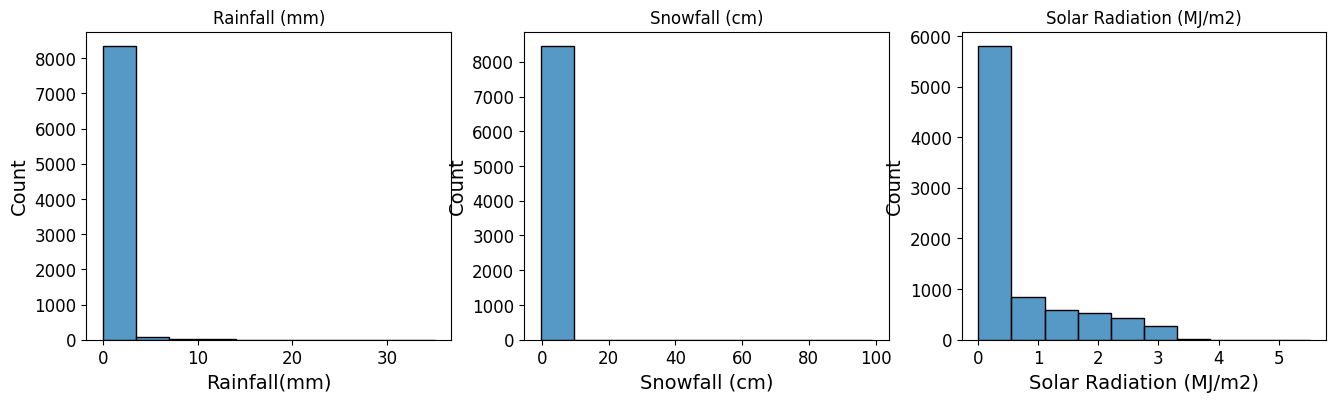

In [21]:
# Create subplots for each feature
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16, 4))

# Plot the distribution of rainfall
sns.histplot(data=df_cleaned, x="Rainfall(mm)", bins=10, ax=axes[0])
axes[0].set_title("Rainfall (mm)")

# Plot the distribution of snowfall
sns.histplot(data=df_cleaned, x="Snowfall (cm)", bins=10, ax=axes[1])
axes[1].set_title("Snowfall (cm)")

# Plot the distribution of solar radiation
sns.histplot(data=df_cleaned, x="Solar Radiation (MJ/m2)", bins=10, ax=axes[2])
axes[2].set_title("Solar Radiation (MJ/m2)")

# Show the figure
plt.show()


In [22]:
df_cleaned['Temperature (C)'] = np.where(df_cleaned['Temperature (C)'] < 50, df_cleaned['Temperature (C)'], np.nan)
df_cleaned['Humidity (%)'] = np.where(df_cleaned['Humidity (%)'] < 100, df_cleaned['Humidity (%)'], np.nan)
df_cleaned['Wind speed (m/s)'] = np.where(df_cleaned['Wind speed (m/s)'] < 100, df_cleaned['Wind speed (m/s)'], np.nan)
df_cleaned['Rented Bike Count'] = np.where(df_cleaned['Rented Bike Count'] < 4000, df_cleaned['Rented Bike Count'], np.nan)

In [23]:
df_cleaned.describe().T

,count,mean,std,min,25%,50%,75%,max
Rented Bike Count,8464.0,729.125354,642.382517,2.0,214.0,542.00,1084.00,3556.00
Hour,8465.0,11.507029,6.920899,0.0,6.0,12.00,18.00,23.00
Temperature (C),8462.0,12.774226,12.109102,-17.8,3.0,13.50,22.70,42.00
Humidity (%),8464.0,58.143526,20.495299,-2.2,42.0,57.00,74.00,98.00
Wind speed (m/s),8464.0,1.737370,1.426713,-0.7,0.9,1.50,2.30,91.80
Visibility (10m),8465.0,1433.873479,609.051229,27.0,935.0,1690.00,2000.00,2000.00
Dew point temperature (C),8465.0,3.944997,13.242399,-30.6,-5.1,4.70,15.20,27.20
Solar Radiation (MJ/m2),8464.0,0.567771,0.868830,0.0,0.0,0.01,0.93,5.52
Rainfall(mm),8444.0,0.149491,1.126914,0.0,0.0,0.00,0.00,35.00
Snowfall (cm),8444.0,0.089507,1.164716,-0.4,0.0,0.00,0.00,99.00


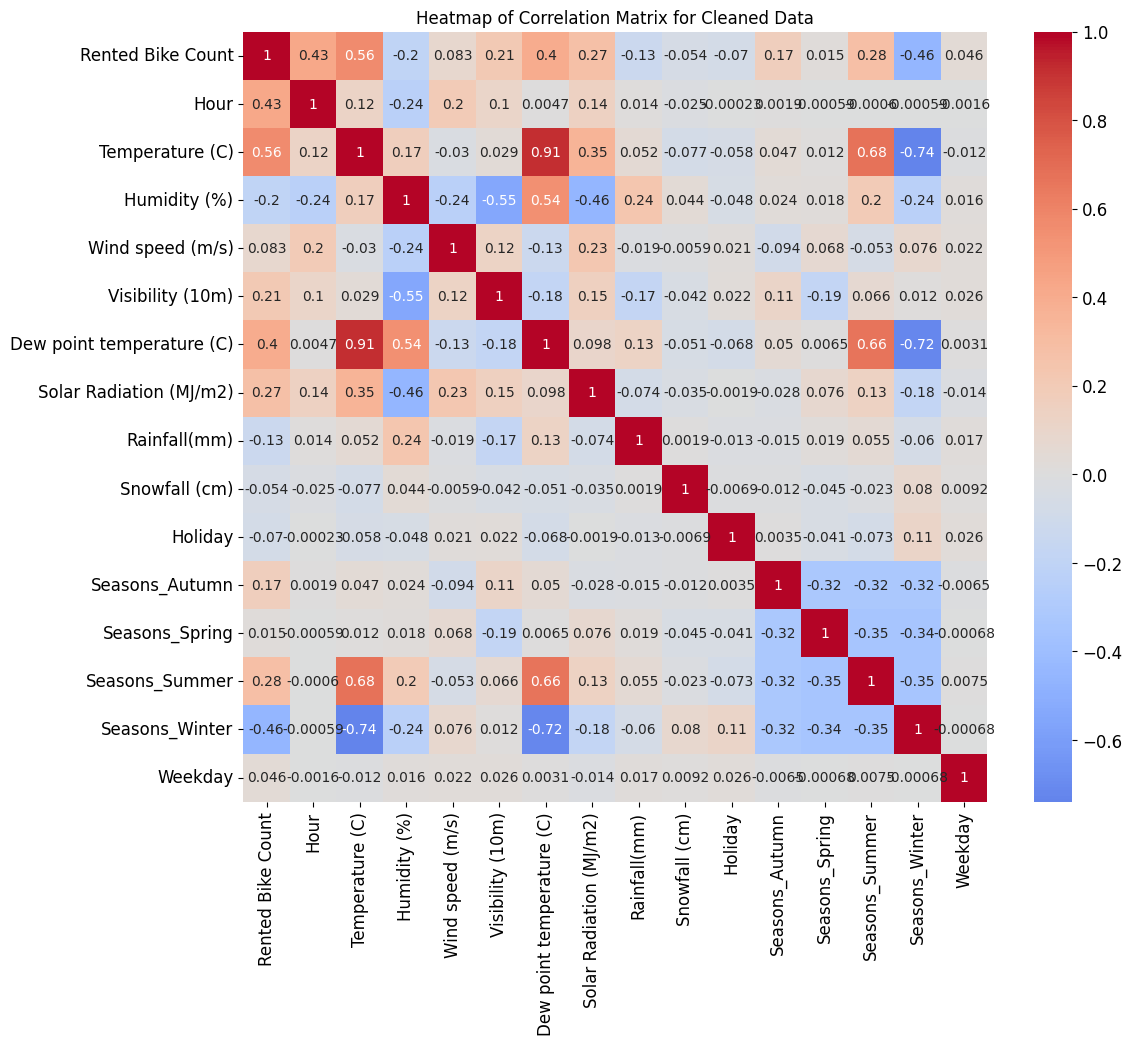

In [24]:
# Create a correlation matrix
correlation_matrix = df_cleaned.corr()

# Create a heatmap
plt.figure(figsize=(12,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Heatmap of Correlation Matrix for Cleaned Data')
plt.show()


In [25]:
df_cleaned.to_csv('CleanedSeoulBikeData.csv', index=False)

## Step 2: Pre-process the data and perform the first fit (20%)

### 2.1 Imputation and Pre-Processing

Make sure that you have set any problematic values in the numerical data to `np.nan` and then write code for a **sklearn *pipeline* that will perform imputation** to replace problematic entries (nan values) with an appropriate **median** value ***and* do any other pre-processing** that you think should be used.

In [26]:
### Your code here
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median'))
])

In [27]:
df_cleaned_imputed = pd.DataFrame(pipeline.fit_transform(df_cleaned),columns=df_cleaned.columns)


### 2.2 Predicting bike rentals

A regression approach will be used for this problem: that is, "bike rentals" will be treated as a real number whose value will be predicted. If necessary, it could be rounded to the nearest integer afterwards, but this will not be necessary here. The root mean squared error (RMSE) metric will be used to quantify performance.  

**Split the data** appropriately so that 20% of it will be kept as a hold-out test set. **Using the pipeline** you wrote above, pre-process and fit a ***linear regression* model** to the data in an appropriate way. After this, **calculate and print the RMSE of the fit to the training data**.

To act as a simple baseline for comparison purposes, **also calculate and print the RMSE** that you would get if _all_ the predictions were set to be the **mean of the training targets** (i.e. bike rentals).

In [28]:
### import the neccesary package
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [29]:
X=df_cleaned_imputed.drop('Rented Bike Count',axis=1)
y=df_cleaned_imputed['Rented Bike Count']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('regressor', LinearRegression())
])

In [31]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('regressor', LinearRegression())])

In [32]:
y_train_mean = np.full_like(y_train, y_train.mean())
baseline_rmse = np.sqrt(mean_squared_error(y_train, y_train_mean))
print(f'Baseline RMSE (mean of training targets): {baseline_rmse}')

Baseline RMSE (mean of training targets): 646.170499547999


In [33]:
y_train_pred=pipeline.predict(X_train)

rmse_train=np.sqrt(mean_squared_error(y_train,y_train_pred))
print(rmse_train)

437.734576896877


In [34]:
y_test_pred = pipeline.predict(X_test)

# Calculate RMSE for the test data
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f'RMSE on test data: {rmse_test}')

RMSE on test data: 417.16609924446226


In [35]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('regressor', SVR(kernel='rbf'))
])

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Predict on the training data
y_train_pred = pipeline.predict(X_train)

# Calculate RMSE for the training data
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
print(f'RMSE on training data: {rmse_train}')

# Calculate the baseline RMSE using the mean of the training targets
y_train_mean = np.full_like(y_train, y_train.mean())
baseline_rmse = np.sqrt(mean_squared_error(y_train, y_train_mean))
print(f'Baseline RMSE (mean of training targets): {baseline_rmse}')

# Predict on the test data
y_test_pred = pipeline.predict(X_test)

# Calculate RMSE for the test data
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f'RMSE on test data: {rmse_test}')

RMSE on training data: 527.4678179756158
Baseline RMSE (mean of training targets): 646.170499547999
RMSE on test data: 501.41151646958025


## Step 3: Hyper-parameter optimisation (30%)

**Use ChatGPT** (along with any modifications that you require) to create and run code (using sklearn pipelines) that will do the following:
 - fit a **linear regression** and a **Support Vector Regression** method to the data using **10-fold cross validation** for each model
 - display the **mean and standard deviation** of the **RMSE values** for each model (at baseline) in the _appropriate datasets_
 - perform a **hyper-parameter optimisation** on each model using **GridSearch**
 - display the **mean and standard deviation** of the **RMSE values** for each model (after optimisation) in the _appropriate datasets_
 - choose the **best model** and **visualise the results** with a single graphic of your choice

**Display the ChatGPT prompt** and the **code**, _including any fixes_ that you needed to make to get the code to work, along with the **outputs** obtained by running the code.


### Your ChatGPT prompt
Use sklearn pipelines to:
1. Fit a linear regression and a Support Vector Regression (SVR) model to the data using 10-fold cross-validation for each model.
2. Display the mean and standard deviation of the RMSE values for each model at baseline.
3. Perform hyperparameter optimization on each model using GridSearch.
4. Display the mean and standard deviation of the RMSE values for each model after optimization.
5. Choose the best model and visualize the results with a single graphic of your choice.

Please provide the code, including any fixes needed to make it work, and the outputs.


In [36]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error, make_scorer

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
pipeline_lr=Pipeline([
    ('scaler',StandardScaler()),
    ('regressor',LinearRegression())
])

pipeline_svr=Pipeline([
    ('scaler',StandardScaler()),
    ('regressor',SVR())
])

# Define RMSE scorer
rmse_scorer = make_scorer(lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true, y_pred)), greater_is_better=False)



In [38]:
cv_scores_lr=cross_val_score(pipeline_lr,X_train,y_train,cv=10,scoring=rmse_scorer)
cv_scores_svr=cross_val_score(pipeline_svr,X_train,y_train,cv=10,scoring=rmse_scorer)

print(f"Linear Regression - Mean RMSE: {cv_scores_lr.mean()}, Std RMSE: {cv_scores_lr.std()}")
print(f"SVR - Mean RMSE: {cv_scores_svr.mean()}, Std RMSE: {cv_scores_svr.std()}")

Linear Regression - Mean RMSE: -440.70736659352804, Std RMSE: 15.356787219579028
SVR - Mean RMSE: -536.1844825365631, Std RMSE: 20.440758847652564


In [39]:
# Define parameter grids
param_grid_lr = {
    'regressor__fit_intercept': [True, False]
}

param_grid_svr = {
    'regressor__C': [0.1, 1, 10],
    'regressor__epsilon': [0.1, 0.2, 0.5],
    'regressor__kernel': ['linear', 'poly', 'rbf']
}

# GridSearch for Linear Regression
grid_search_lr = GridSearchCV(pipeline_lr, param_grid_lr, cv=10, scoring=rmse_scorer)
grid_search_lr.fit(X_train, y_train)
best_lr = grid_search_lr.best_estimator_

# GridSearch for SVR
grid_search_svr = GridSearchCV(pipeline_svr, param_grid_svr, cv=10, scoring=rmse_scorer)
grid_search_svr.fit(X_train, y_train)
best_svr = grid_search_svr.best_estimator_

# Cross-validation after hyperparameter optimization
cv_scores_lr_optimized = cross_val_score(best_lr, X_train, y_train, cv=10, scoring=rmse_scorer)
cv_scores_svr_optimized = cross_val_score(best_svr, X_train, y_train, cv=10, scoring=rmse_scorer)

# Display optimized RMSE values
print(f"Optimized Linear Regression - Mean RMSE: {cv_scores_lr_optimized.mean()}, Std RMSE: {cv_scores_lr_optimized.std()}")
print(f"Optimized SVR - Mean RMSE: {cv_scores_svr_optimized.mean()}, Std RMSE: {cv_scores_svr_optimized.std()}")


Optimized Linear Regression - Mean RMSE: -440.70736659352804, Std RMSE: 15.356787219579028
Optimized SVR - Mean RMSE: -396.9645853578639, Std RMSE: 14.542154961261916


In [40]:
param_grid_lr = {
    'regressor__fit_intercept': [True, False],
    'regressor__positive':[True,False],
    'regressor__n_jobs':[-1,1,2,3,4],
}
grid_search_lr = GridSearchCV(pipeline_lr, param_grid_lr, cv=10, scoring=rmse_scorer)
grid_search_lr.fit(X_train, y_train)
best_lr = grid_search_lr.best_estimator_

cv_scores_lr_optimized = cross_val_score(best_lr, X_train, y_train, cv=10, scoring=rmse_scorer)
print(f"Optimized Linear Regression - Mean RMSE: {cv_scores_lr_optimized.mean()}, Std RMSE: {cv_scores_lr_optimized.std()}")

/usr/local/lib/python3.11/site-packages/scipy/optimize/_nnls.py:135: LinAlgWarning: Ill-conditioned matrix (rcond=6.82795e-17): result may not be accurate.
  s[P] = solve(AtA[P_ind[:, None], P_ind[None, :]], Atb[P],
/usr/local/lib/python3.11/site-packages/scipy/optimize/_nnls.py:135: LinAlgWarning: Ill-conditioned matrix (rcond=1.00321e-16): result may not be accurate.
  s[P] = solve(AtA[P_ind[:, None], P_ind[None, :]], Atb[P],
/usr/local/lib/python3.11/site-packages/scipy/optimize/_nnls.py:135: LinAlgWarning: Ill-conditioned matrix (rcond=6.71949e-17): result may not be accurate.
  s[P] = solve(AtA[P_ind[:, None], P_ind[None, :]], Atb[P],
/usr/local/lib/python3.11/site-packages/scipy/optimize/_nnls.py:135: LinAlgWarning: Ill-conditioned matrix (rcond=6.82795e-17): result may not be accurate.
  s[P] = solve(AtA[P_ind[:, None], P_ind[None, :]], Atb[P],
/usr/local/lib/python3.11/site-packages/scipy/optimize/_nnls.py:135: LinAlgWarning: Ill-conditioned matrix (rcond=1.00321e-16): result m

Optimized Linear Regression - Mean RMSE: -440.70736659352804, Std RMSE: 15.356787219579028


/usr/local/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:542: FitFailedWarning: 
60 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/site-packages/sklearn/base.py", line 1351, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/site-packages/sklearn/pipeline.py", line 475, in fit
    self._final_estimator.fit(Xt, y, **l

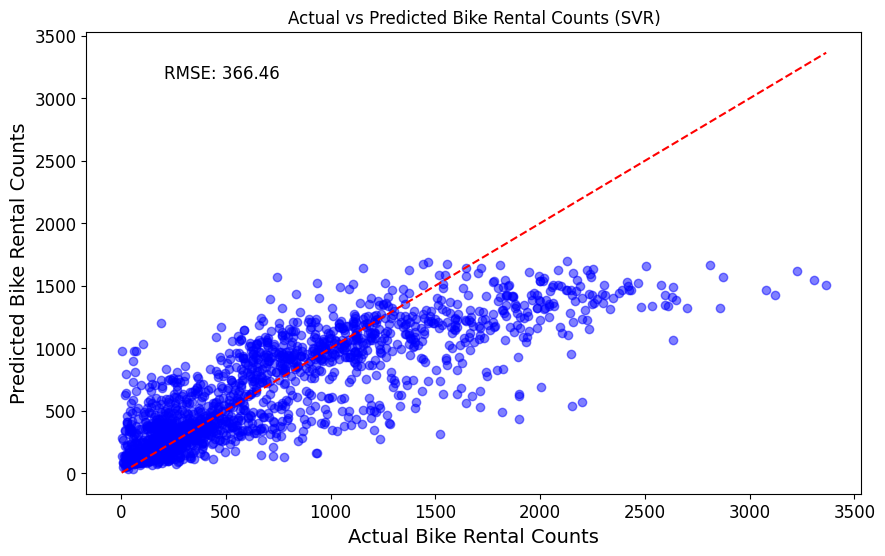

In [41]:
best_svr.fit(X_train, y_train)

# Predict on the test set
y_pred = best_svr.predict(X_test)

rmse=np.sqrt(mean_squared_error(y_test,y_pred))
# Plotting actual vs predicted counts
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.annotate(f'RMSE: {rmse:.2f}',
             xy=(0.1, 0.9),
             xycoords='axes fraction',
             fontsize=12)
plt.title('Actual vs Predicted Bike Rental Counts (SVR)')
plt.xlabel('Actual Bike Rental Counts')
plt.ylabel('Predicted Bike Rental Counts')
plt.show()

## Step 4: Further improvements (10%)

Consider the code that you obtained from ChatGPT above and find one error, or one thing that could be improved, or one reasonable alternative (even if it might not necessarily lead to an improvement).  **Describe this error/improvement/alternative in the box below.**

## Answer From ChatGPT and its Error:
 The initial answer from ChatGPT for the above problem didn't fully address the entire question, as it failed to include the requested graph of the model. Additionally, I had to adjust a few parameters for the GridSearchCV for Linear Regression, as it was giving me errors related to normalize and alpha. By modifying these parameters, the GridSearchCV ran successfully. The initial RMSE calculation for GridSearchCV was highly deviated from the actual value, prompting a change in the RMSE scorer formula. For SVR, the GridSearchCV with 10-fold cross-validation optimized the model significantly, reducing the RMSE from 520 to 366. The Standard Deviation of the same Reduced from 20 to 14.5 which is a significant improvement from the first initial fit.This improvement is clearly illustrated in the accompanying graph, demonstrating the enhanced performance of the SVR model after optimization. 

